In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [4]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
# 5728 data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
# Contains two classes: 1 (Spam) and 0 (Ham)
data['spam'].unique()

array([1, 0], dtype=int64)

In [7]:
# No missing data
data.isnull().sum(axis=0)

text    0
spam    0
dtype: int64

In [8]:
ham = data[data['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
ham['msg_length'] = ham['text'].apply(lambda x: len(x))
ham

C:\Users\Anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,spam,msg_length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [10]:
spam = data[data['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [11]:
spam['msg_length'] = spam['text'].apply(lambda x: len(x))
spam

C:\Users\Anish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,spam,msg_length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [12]:
# A lot more ham than spam...
len(spam), len(ham)

(1368, 4360)

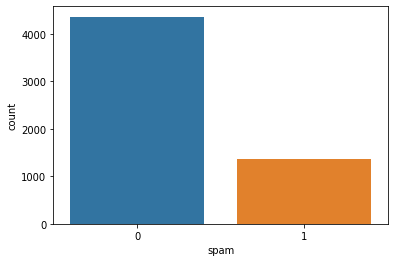

In [13]:
import seaborn as sns
sns.countplot(data['spam'], label="Spam vs. Ham")

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectoriser = CountVectorizer()
X = vectoriser.fit_transform(data['text'])

In [15]:
vectoriser.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '00000000',
 '0000000000',
 '000000000003619',
 '000000000003991',
 '000000000003997',
 '000000000005168',
 '000000000005409',
 '000000000005411',
 '000000000005412',
 '000000000005413',
 '000000000005820',
 '000000000006238',
 '000000000006452',
 '000000000007494',
 '000000000007498',
 '000000000007876',
 '000000000010552',
 '000000000011185',
 '000000000012677',
 '000000000012734',
 '000000000012735',
 '000000000012736',
 '000000000012738',
 '000000000012741',
 '000000000012987',
 '000000000013085',
 '000000000013287',
 '000000000015384',
 '000000000015793',
 '000000000023619',
 '000000000024099',
 '000000000025307',
 '000000000025312',
 '000010220',
 '0000102317',
 '0000102374',
 '0000102789',
 '0000104281',
 '0000104282',
 '0000104486',
 '0000104631',
 '0000104730',
 '0000104776',
 '0000104778',
 '0000107043',
 '0000108729',
 '000066',
 '0001',
 '000166',
 '0002',
 '000202',
 '0003',
 '0004',
 '0005',
 '0006',
 '00076',
 '0009249480',
 '000924948

In [16]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
X.shape
y = data['spam'].values

In [18]:
df = pd.DataFrame(X)
df['class'] = y

In [19]:
df

,0,class
0,"(0, 32371)\t1\n (0, 23381)\t1\n (0, 18838)...",1
1,"(0, 32371)\t1\n (0, 18848)\t6\n (0, 33450)...",1
2,"(0, 32371)\t1\n (0, 37024)\t1\n (0, 18848)...",1
3,"(0, 32371)\t1\n (0, 18848)\t1\n (0, 24274)...",1
4,"(0, 32371)\t1\n (0, 18848)\t1\n (0, 33798)...",1
...,...,...
5723,"(0, 32371)\t3\n (0, 18848)\t1\n (0, 33798)...",0
5724,"(0, 32371)\t2\n (0, 37024)\t1\n (0, 33798)...",0
5725,"(0, 32371)\t2\n (0, 37024)\t2\n (0, 18848)...",0
5726,"(0, 32371)\t5\n (0, 37024)\t1\n (0, 33798)...",0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [21]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.score(X_test, y_test)

0.9910100475938657

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1449
           1       0.97      0.99      0.98       442

    accuracy                           0.99      1891
   macro avg       0.98      0.99      0.99      1891
weighted avg       0.99      0.99      0.99      1891

[[1435   14]
 [   3  439]]
0.9910100475938657


In [27]:
# Model predicted the data was spam
test_example_spam = ['FREE MONEY!!! PLEASE CLICK THE FOLLOWING LINK TO ACCEPT THE MONEY!!!']
test_example_spam_vectorised = vectoriser.transform(test_example_spam)
model.predict(test_example_spam_vectorised)

array([1], dtype=int64)

In [29]:
# Model predicted the data was ham
test_example_ham = ['Hello linda, there is a meeting this weekend. Please make sure you attend!']
test_example_ham_vectorised = vectoriser.transform(test_example_ham)
model.predict(test_example_ham_vectorised)

array([0], dtype=int64)